### TASK - 1 | Downloaded and loaded Zameen.com property data from https://www.kaggle.com/datasets/huzzefakhan/zameencom-property-data-pakistan

In [2]:
import pandas as pd
data = pd.read_csv('Property_with_Feature_Engineering.csv')

### TASK-2 | Describe the data properties of each column, 
1. Datatype of each column 
2. Missing values in each column 
3. Null values in each column 
4. Outliers in each column

In [3]:
# 1.
data.dtypes

property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
price_bin         object
location          object
city              object
province_name     object
locality          object
latitude         float64
longitude        float64
baths              int64
area              object
area_marla       float64
area_sqft        float64
purpose           object
bedrooms           int64
date_added        object
year               int64
month              int64
day                int64
agency            object
agent             object
dtype: object

In [4]:
# 2.
data.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
price_bin            0
location             0
city                 0
province_name        0
locality             0
latitude             0
longitude            0
baths                0
area                 0
area_marla           0
area_sqft            0
purpose              0
bedrooms             0
date_added           0
year                 0
month                0
day                  0
agency           47379
agent            47380
dtype: int64

In [5]:
#3.
data.isna().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
price_bin            0
location             0
city                 0
province_name        0
locality             0
latitude             0
longitude            0
baths                0
area                 0
area_marla           0
area_sqft            0
purpose              0
bedrooms             0
date_added           0
year                 0
month                0
day                  0
agency           47379
agent            47380
dtype: int64

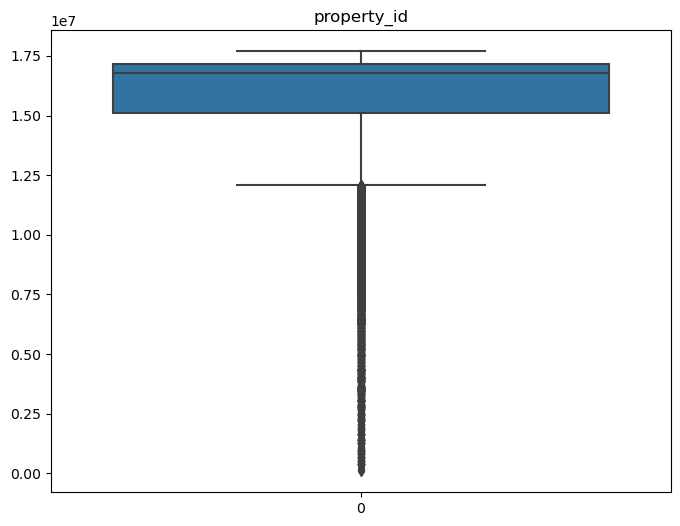

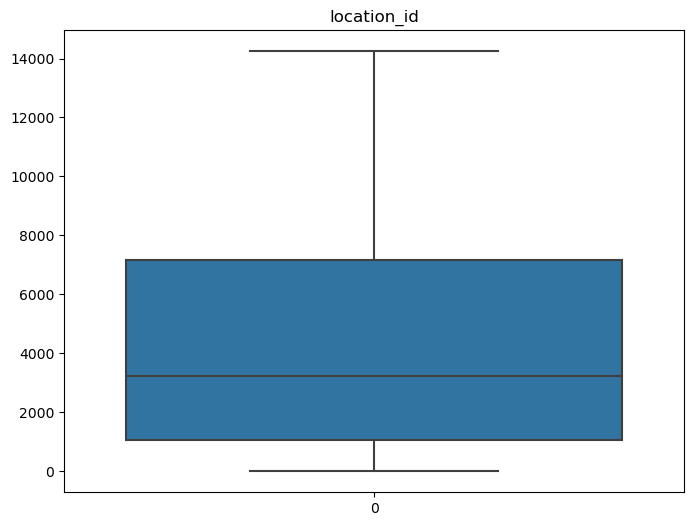

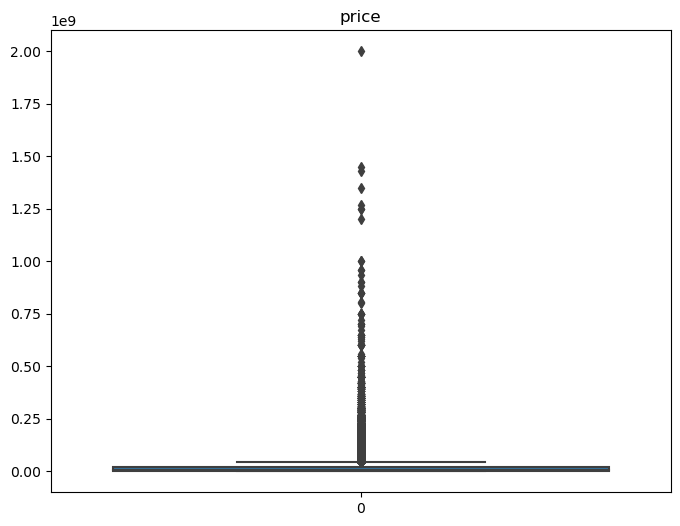

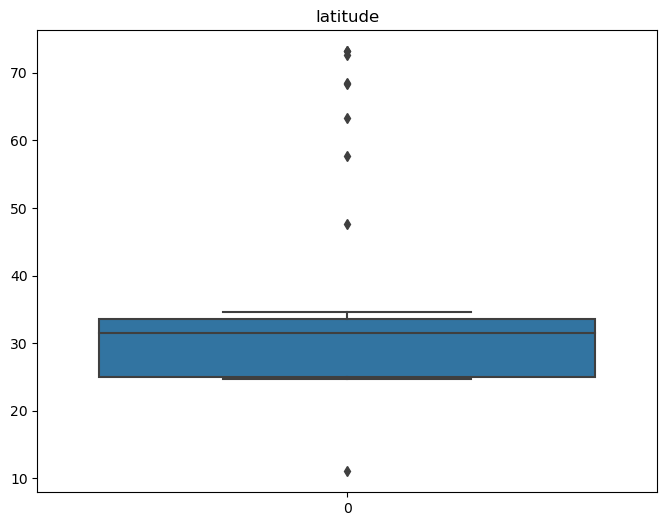

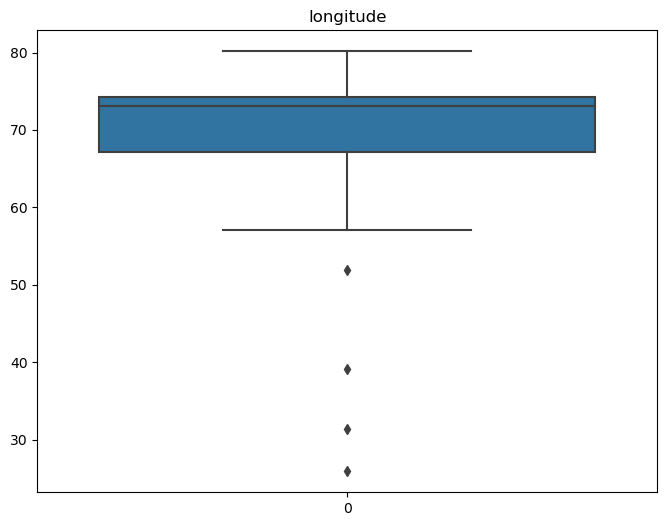

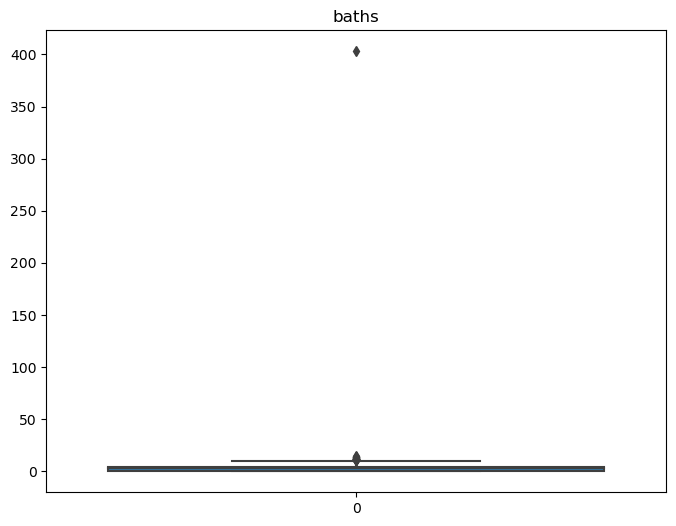

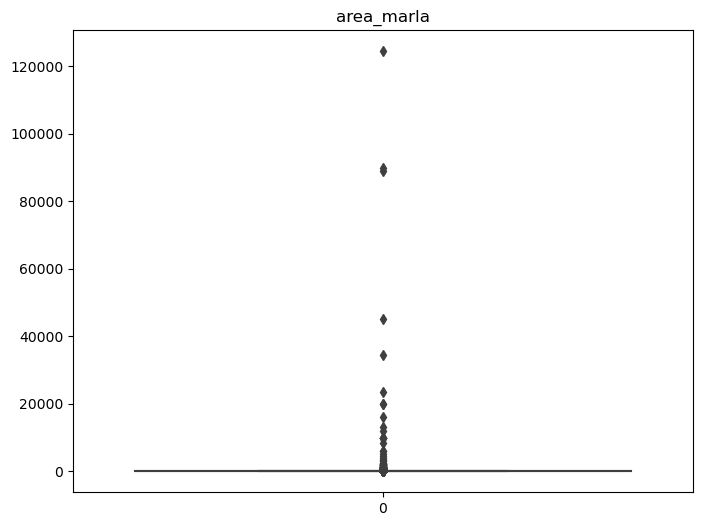

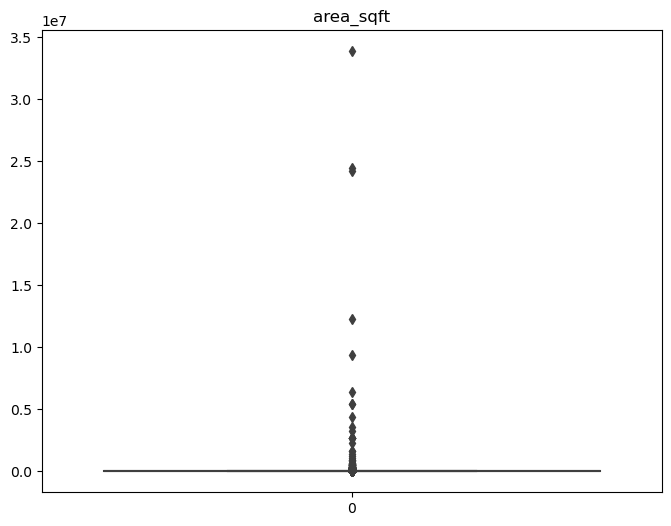

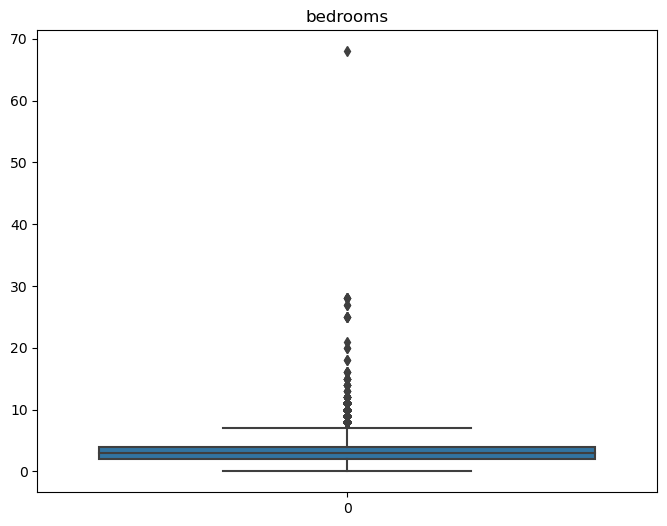

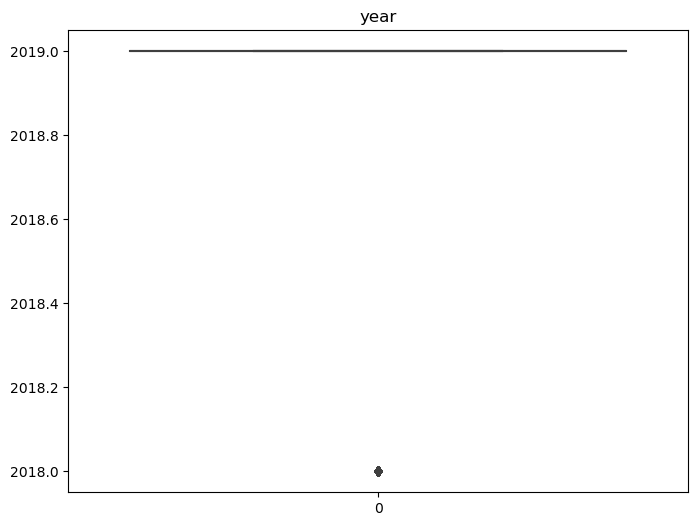

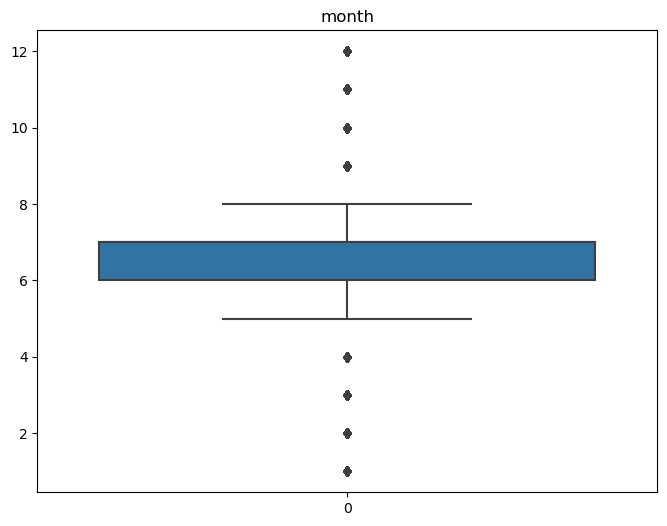

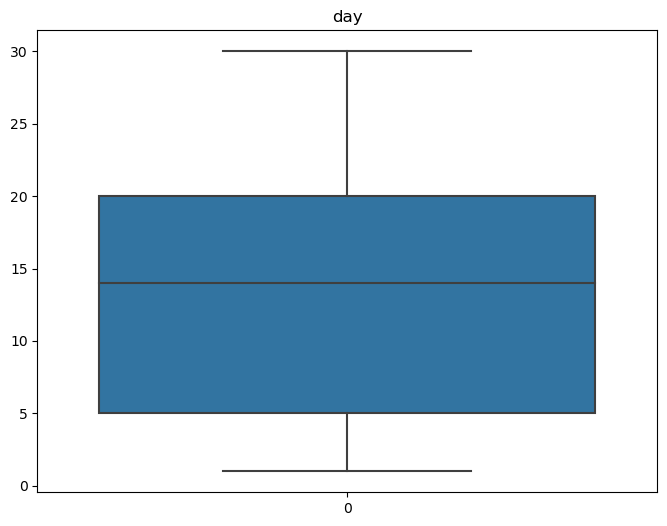

In [6]:
# 4. Box plotting for numerical columns to visualize outliers.
import seaborn as sns
import matplotlib.pyplot as plt

columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

### TASK - 3 | Handle null values by replacing them with suitable values.

In [7]:
import pandas as pd
data.fillna(0, inplace=True)


### TASK - 4 | Suppose you have to predict the cost of a house. For this purpose, select the appropriate columns that will help you develop a machine learning model. Save the selected columns dataset in a separate CSV file.

In [8]:
import pandas as pd
selected_columns = ['property_id','location_id','page_url','property_type','price','price_bin','location','city','province_name','locality']
selected_data = data[selected_columns]
selected_data.to_csv('results_of_selected_house.csv', index=False)

### TASK - 5 | List down the descriptive variables and target variable.

In [9]:
X = selected_data.drop('price', axis=1)  
Y = selected_data['locality']

### TASK - 6 | Describe the statistics of the new data.

In [10]:
import pandas as pd

selected_data = pd.read_csv('results_of_selected_house.csv')
numerical_stats = selected_data.describe()
categorical_stats = selected_data.describe(include=['object'])

print("Summary statistics for numerical variables:")
print(numerical_stats)

print("\nFrequency counts for categorical variables:")
print(categorical_stats)

Summary statistics for numerical variables:
        property_id    location_id         price
count  1.913930e+05  191393.000000  1.913930e+05
mean   1.573170e+07    4224.580350  1.644655e+07
std    2.215249e+06    3719.125201  3.416412e+07
min    8.657500e+04       1.000000  0.000000e+00
25%    1.511867e+07    1057.000000  8.000000e+04
50%    1.676385e+07    3233.000000  7.300000e+06
75%    1.715282e+07    7182.000000  1.800000e+07
max    1.769386e+07   14246.000000  2.000000e+09

Frequency counts for categorical variables:
                                                 page_url property_type  \
count                                              191393        191393   
unique                                             191393             7   
top     https://www.zameen.com/Property/lahore_model_t...         House   
freq                                                    1        118915   

       price_bin     location     city province_name  \
count     191393       191393   191393

### TASK - 7 | Compute the covariance and correlation matrices among descriptive variables.

In [16]:
import pandas as pd

selected_data = pd.read_csv('results_of_selected_house.csv')

# Identify non-numeric columns
non_numeric_columns = selected_data.select_dtypes(exclude=['float64', 'int64']).columns

# Drop non-numeric columns
selected_data_numeric = selected_data.drop(columns=non_numeric_columns)

# Calculate covariance matrix
covariance_matrix = selected_data_numeric.cov()

# Calculate correlation matrix
correlation_matrix = selected_data_numeric.corr()

# Print the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Covariance Matrix:
              property_id   location_id         price
property_id  4.907330e+12 -9.074539e+07 -3.003616e+12
location_id -9.074539e+07  1.383189e+07 -1.033500e+10
price       -3.003616e+12 -1.033500e+10  1.167187e+15

Correlation Matrix:
             property_id  location_id     price
property_id     1.000000    -0.011014 -0.039687
location_id    -0.011014     1.000000 -0.081339
price          -0.039687    -0.081339  1.000000


### TASK - 8 | Group the data by city, location, and area.

In [21]:
import pandas as pd

selected_data = pd.read_csv('Property_with_Feature_Engineering.csv')
grouped_data = selected_data.groupby(['city', 'location', 'area'])

# Sort the grouped data by a column, e.g., 'property_id', in descending order
sorted_grouped_data = grouped_data.apply(lambda x: x.sort_values(by='property_id', ascending=False))

# Iterate over the top 10 groups
for group, group_data in sorted_grouped_data.head(10).groupby(level=[0, 1, 2]):
    print("City:", group[0])
    print("Location:", group[1])
    print("Area:", group[2])
    print("Property ID:", group_data['property_id'].mean())
    print("\n")


City: Faisalabad
Location: 204 Chak Road
Area: 12 Marla
Property ID: 17355575.0


City: Faisalabad
Location: 204 Chak Road
Area: 19 Marla
Property ID: 10053844.0


City: Faisalabad
Location: 204 Chak Road
Area: 2.5 Marla
Property ID: 15029742.0


City: Faisalabad
Location: 204 Chak Road
Area: 3.3 Marla
Property ID: 12038300.0


City: Faisalabad
Location: 204 Chak Road
Area: 4.5 Marla
Property ID: 14375798.0


City: Faisalabad
Location: 204 Chak Road
Area: 5 Marla
Property ID: 12739735.0




### TASK - 9 | Count the total values of each item for all attributes.

In [14]:
import pandas as pd
selected_data = pd.read_csv('Property_with_Feature_Engineering.csv')

for column in selected_data.columns:
    print("Attribute:", column)
    print(selected_data[column].value_counts())
    print("\n")

Attribute: property_id
property_id
347795      1
17055095    1
17054555    1
17054578    1
17054672    1
           ..
15844370    1
15844668    1
15844823    1
15845395    1
17468660    1
Name: count, Length: 191393, dtype: int64


Attribute: location_id
location_id
1483     2955
1448     1818
329      1763
9030     1695
1447     1595
         ... 
9357        1
13645       1
4017        1
3552        1
3216        1
Name: count, Length: 4321, dtype: int64


Attribute: page_url
page_url
https://www.zameen.com/Property/lahore_model_town_6_kanal_excellent_house_for_sale_in_model_town-347795-8-1.html                                                                                      1
https://www.zameen.com/Property/islamabad_pwd_housing_scheme_well_built_house_available_in_good_location-17055095-424-4.html                                                                          1
https://www.zameen.com/Property/islamabad_d_12_well_built_portion_available_in_good_location-17054555-160-4

### TASK - 10 | Encode categorical values of 'property_type' and 'province_name' features with numbers.

In [15]:
from sklearn.preprocessing import LabelEncoder

selected_data = pd.read_csv('Property_with_Feature_Engineering.csv')
label_encoder = LabelEncoder()
selected_data['property_type_encoded'] = label_encoder.fit_transform(selected_data['property_type'])
selected_data['province_name_encoded'] = label_encoder.fit_transform(selected_data['province_name'])
print(selected_data.head())

   property_id  location_id  \
0       347795            8   
1       482892           48   
2       555962           75   
3       562843         3821   
4       686990         3522   

                                            page_url property_type      price  \
0  https://www.zameen.com/Property/lahore_model_t...         House  220000000   
1  https://www.zameen.com/Property/lahore_multan_...         House   40000000   
2  https://www.zameen.com/Property/eden_eden_aven...         House    9500000   
3  https://www.zameen.com/Property/gulberg_2_gulb...         House  125000000   
4  https://www.zameen.com/Property/allama_iqbal_t...         House   21000000   

   price_bin           location    city province_name  \
0  Very High         Model Town  Lahore        Punjab   
1  Very High        Multan Road  Lahore        Punjab   
2        Low               Eden  Lahore        Punjab   
3  Very High            Gulberg  Lahore        Punjab   
4       High  Allama Iqbal Town  Lahore  